**Общая информация**

**Срок сдачи:** 18 октября 2017, 06:00 <br\>
**Штраф за опоздание:** -2 балла после 06:00 18 октября, -4 балла после 06:00 25 октября, -6 баллов после 06:00 1 ноября

При отправлении ДЗ указывайте фамилию в названии файла
Присылать ДЗ необходимо в виде ссылки на свой github репозиторий в slack @alkhamush

Необходимо в slack создать таск в приватный чат:
/todo Фамилия Имя ссылка на гитхаб @alkhamush
Пример:
/todo Ксения Стройкова https://github.com/stroykova/spheremailru/stroykova_hw1.ipynb @alkhamush
Дополнительно нужно просто скинуть ссылку в slack в личный чат

Используйте данный Ipython Notebook при оформлении домашнего задания.

###### Задание 1 (2 баллов)
Реализовать KNN в классе MyKNeighborsClassifier (обязательное условие: точность не ниже sklearn реализации)
Разберитесь самостоятельно, какая мера расстояния используется в KNeighborsClassifier дефолтно и реализуйте свой алгоритм именно с этой мерой. Самостоятельно разберитесь, как считается score из KNeighborsClassifier и реализуйте аналог в своём классе. Score не должен уступать значению KNN из sklearn

###### Задание 2 (2 балла)
Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy

###### Задание 3 (2 балла)
Для iris найдите такой параметр n_neighbors, при котором выдаётся наилучший score. Нарисуйте график зависимости score от n_neighbors

###### Задание 4 (3 балла)
Добавить algorithm='kd_tree' в реализацию KNN (использовать KDTree из sklearn.neighbors). Значение n_neighbors нужно взять из задания 3. Добиться скорости работы на fit,  predict и predict_proba сравнимой со sklearn для iris и mnist
Для этого используем numpy. Score не должен уступать значению KNN из sklearn

###### Задание 5 (1 балла)
Описать для чего нужны следующие библиотеки/классы/функции (список будет ниже)

**Штрафные баллы:**

1. Невыполнение PEP8 -1 балл
2. Отсутствие фамилии в имени скрипта (скрипт должен называться по аналогии со stroykova_hw1.ipynb) -1 балл
3. Все строчки должны быть выполнены. Нужно, чтобы output команды можно было увидеть уже в git'е. В противном случае -1 балл
4. При оформлении ДЗ нужно пользоваться данным файлом в качестве шаблона. Не нужно удалять и видоизменять структуру кода и текст. В противном случае -1 балл


In [179]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
from sklearn import datasets
from sklearn.base import ClassifierMixin
from sklearn.datasets import fetch_mldata
from sklearn.neighbors.base import NeighborsBase, KNeighborsMixin, SupervisedIntegerMixin 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KDTree
from sklearn import metrics
#%load_ext pycodestyle_magic

In [180]:
#%%pycodestyle

class MyKNeighborsClassifier(NeighborsBase, KNeighborsMixin, 
                             SupervisedIntegerMixin, ClassifierMixin):
    
    def __init__(self, n_neighbors, algorithm='brute'):
        self.n_neighbors = n_neighbors
        self.algorithm = algorithm
    
    def fit(self, X, y):
        self.X_train = np.array(X).astype(float)
        self.y_train = np.array(y).astype('int64')
        self.num_of_classes = len(np.unique(y))
        #self.train_size = X.shape[0]
        if self.algorithm is 'kd_tree':
            self.kd_tree = KDTree(self.X_train)
    
    def _find_ind(self, X):
        if self.algorithm is 'brute':
            dist = metrics.pairwise_distances(np.array(X).astype(float), self.X_train)
            self.ind = dist.argpartition(self.n_neighbors)[:, :self.n_neighbors]
        elif self.algorithm is 'kd_tree':
            _, self.ind = self.kd_tree.query(np.array(X).astype(float), k = self.n_neighbors)
    
    def predict(self, X):
        self._find_ind(X)
        return np.apply_along_axis(lambda x: np.bincount(x).argmax(), 1, self.y_train[self.ind])
        
    def predict_proba(self, X):
        self._find_ind(X)
        pred = np.zeros((X.shape[0], self.num_of_classes))
        for i in range(X.shape[0]):
            for j in self.ind[i]:
                pred[i][self.y_train[j]] += 1
        return pred / self.n_neighbors

    def score(self, X, y):
        return np.sum(y == self.predict(X)) / len(y)

**IRIS**

In [181]:
iris = datasets.load_iris()

In [182]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.1, stratify=iris.target)

In [183]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [184]:
%time clf.fit(X_train, y_train)

Wall time: 0 ns


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [185]:
%time my_clf.fit(X_train, y_train)

Wall time: 1e+03 µs


In [186]:
%time clf.predict(X_test)

Wall time: 21.6 ms


array([0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0])

In [187]:
%time my_clf.predict(X_test)

Wall time: 12 ms


array([0, 1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 1, 0, 2, 0], dtype=int64)

In [188]:
%time clf.predict_proba(X_test)

Wall time: 3 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [189]:
%time my_clf.predict_proba(X_test)

Wall time: 15 ms


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.]])

In [190]:
clf.score(X_test, y_test)

0.9333333333333333

In [191]:
my_clf.score(X_test, y_test)

0.9333333333333333

Задание 3

Best is 17


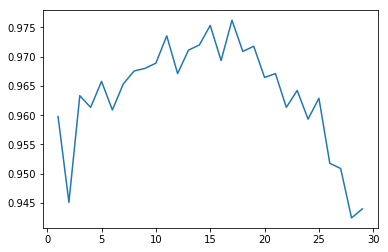

In [192]:
Tests = 300
Max_Neigh = 30
res = []

for i in range(1, Max_Neigh):
    cur_res = []
    for j in range(Tests):
        X_train, X_test, y_train, y_test = train_test_split(
            iris.data, iris.target, test_size = 0.1,
            stratify = iris.target)
        my_clf = MyKNeighborsClassifier(n_neighbors=i)
        my_clf.fit(X_train, y_train)
        cur_res.append(my_clf.score(X_test, y_test))
    res.append(np.mean(cur_res))
    
best = np.argmax(res) + 1
print("Best is {}".format(best))
plt.plot(range(1, Max_Neigh), res)
plt.show()

**MNIST**

In [193]:
mnist = fetch_mldata('MNIST original')

In [194]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [195]:
clf = KNeighborsClassifier(n_neighbors=2)
my_clf = MyKNeighborsClassifier(n_neighbors=2)

In [196]:
%time clf.fit(X_train, y_train)

Wall time: 46.1 s


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [197]:
%time my_clf.fit(X_train, y_train)

Wall time: 373 ms


In [198]:
%time clf.predict(X_test)

Wall time: 1min 21s


array([4., 9., 9., 9., 6., 5., 4., 7., 0., 3., 6., 9., 3., 9., 6., 7., 6.,
       9., 6., 2., 1., 6., 3., 4., 7., 3., 7., 1., 2., 1., 1., 6., 3., 1.,
       1., 1., 3., 6., 1., 6., 1., 2., 0., 3., 4., 7., 2., 4., 8., 3., 4.,
       5., 6., 5., 7., 3., 8., 1., 2., 5., 5., 9., 0., 3., 0., 9., 9., 5.,
       2., 8., 1., 6., 4., 2., 2., 1., 5., 9., 0., 5., 6., 3., 7., 1., 7.,
       8., 8., 1., 7., 5., 6., 4., 8., 7., 7., 7., 1., 6., 2., 3., 0., 4.,
       2., 0., 2., 0., 4., 2., 7., 6., 9., 4., 3., 2., 4., 0., 3., 8., 2.,
       3., 2., 9., 0., 4., 2., 2., 1., 5., 1., 2., 9., 5., 9., 5., 3., 6.,
       0., 4., 5., 9., 6., 3., 6., 3., 1., 3., 7., 8., 4., 5., 3., 7., 5.,
       4., 0., 4., 2., 7., 8., 8., 0., 6., 2., 1., 1., 3., 0., 4., 4., 1.,
       0., 3., 2., 3., 4., 6., 7., 1., 3., 0., 7., 7., 9., 7., 0., 1., 9.,
       6., 7., 3., 0., 6., 7., 6., 2., 0., 0., 3., 6., 3., 3., 3., 5., 7.,
       3., 5., 7., 0., 9., 1., 7., 0., 3., 2., 0., 4., 8., 6., 4., 2., 5.,
       3., 8., 4., 7., 9.

In [199]:
%time my_clf.predict(X_test)

Wall time: 2.48 s


array([4, 9, 9, 9, 6, 5, 4, 7, 0, 3, 6, 9, 3, 9, 6, 7, 6, 9, 6, 2, 1, 6,
       3, 4, 7, 3, 7, 1, 2, 1, 1, 6, 3, 1, 1, 1, 3, 6, 1, 6, 1, 2, 0, 3,
       4, 7, 2, 4, 8, 3, 4, 5, 6, 5, 7, 3, 8, 1, 2, 5, 5, 9, 0, 3, 0, 9,
       9, 5, 2, 8, 1, 6, 4, 2, 2, 1, 5, 9, 0, 5, 6, 3, 7, 1, 7, 8, 8, 1,
       7, 5, 6, 4, 8, 7, 7, 7, 1, 6, 2, 3, 0, 4, 2, 0, 2, 0, 4, 2, 7, 6,
       9, 4, 3, 2, 4, 0, 3, 8, 2, 3, 2, 9, 0, 4, 2, 2, 1, 5, 1, 2, 9, 5,
       9, 5, 3, 6, 0, 4, 5, 9, 6, 3, 6, 3, 1, 3, 7, 8, 4, 5, 3, 7, 5, 4,
       0, 4, 2, 7, 8, 8, 0, 6, 2, 1, 1, 3, 0, 4, 4, 1, 0, 3, 2, 3, 4, 6,
       7, 1, 3, 0, 7, 7, 9, 7, 0, 1, 9, 6, 7, 3, 0, 6, 7, 6, 2, 0, 0, 3,
       6, 3, 3, 3, 5, 7, 3, 5, 7, 0, 9, 1, 7, 0, 3, 2, 0, 4, 8, 6, 4, 2,
       5, 3, 8, 4, 7, 9, 2, 3, 1, 4, 7, 1, 3, 9, 0, 4, 4, 2, 8, 8, 7, 7,
       6, 5, 0, 8, 0, 0, 3, 2, 1, 4, 1, 3, 1, 9, 0, 1, 5, 8, 9, 7, 8, 1,
       5, 0, 7, 8, 6, 0, 6, 5, 2, 4, 0, 8, 0, 8, 4, 3, 4, 3, 8, 4, 3, 2,
       8, 1, 9, 3, 5, 6, 8, 9, 7, 9, 1, 7, 2, 5, 2,

In [200]:
%time clf.predict_proba(X_test)

Wall time: 1min 17s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [201]:
%time my_clf.predict_proba(X_test)

Wall time: 2.53 s


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [202]:
clf.score(X_test, y_test)

0.97

In [203]:
my_clf.score(X_test, y_test)

0.97

Задание 4

In [204]:
clf = KNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')
my_clf = MyKNeighborsClassifier(n_neighbors=2, algorithm='kd_tree')

In [205]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.01, stratify=mnist.target)

In [206]:
%time clf.fit(X_train, y_train)

Wall time: 45.1 s


KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [207]:
%time my_clf.fit(X_train, y_train)

Wall time: 45.5 s


In [208]:
%time clf.predict(X_test)

Wall time: 1min 24s


array([7., 8., 9., 4., 2., 0., 3., 8., 8., 5., 6., 4., 7., 7., 5., 4., 9.,
       3., 4., 3., 9., 0., 4., 1., 4., 8., 6., 1., 9., 7., 6., 5., 1., 1.,
       1., 9., 9., 2., 0., 4., 8., 7., 7., 8., 2., 1., 0., 0., 4., 5., 7.,
       3., 0., 9., 9., 6., 3., 9., 6., 7., 5., 5., 9., 5., 3., 5., 7., 1.,
       0., 0., 7., 6., 8., 0., 2., 7., 2., 1., 2., 0., 9., 8., 5., 1., 1.,
       4., 0., 6., 6., 5., 2., 1., 0., 9., 6., 5., 6., 5., 0., 1., 1., 1.,
       4., 7., 2., 7., 4., 7., 3., 6., 1., 1., 0., 7., 4., 1., 5., 4., 7.,
       5., 7., 2., 1., 6., 9., 6., 8., 1., 3., 8., 9., 3., 0., 4., 3., 2.,
       7., 8., 8., 6., 7., 6., 0., 2., 9., 4., 9., 4., 7., 5., 4., 4., 3.,
       3., 3., 7., 9., 5., 6., 8., 8., 4., 1., 6., 0., 3., 3., 4., 3., 2.,
       8., 8., 3., 1., 3., 6., 9., 5., 6., 7., 9., 9., 3., 8., 3., 8., 0.,
       9., 4., 8., 4., 2., 0., 6., 3., 0., 9., 7., 9., 9., 6., 7., 2., 4.,
       7., 9., 0., 7., 7., 2., 1., 5., 8., 6., 2., 2., 8., 8., 4., 6., 5.,
       4., 3., 7., 3., 1.

In [209]:
%time my_clf.predict(X_test)

Wall time: 1min 7s


array([7, 8, 9, 4, 2, 0, 3, 8, 8, 5, 6, 4, 7, 7, 5, 4, 9, 3, 4, 3, 9, 0,
       4, 1, 4, 8, 6, 1, 9, 7, 6, 5, 1, 1, 1, 9, 9, 2, 0, 4, 8, 7, 7, 8,
       2, 1, 0, 0, 4, 5, 7, 3, 0, 9, 9, 6, 3, 9, 6, 7, 5, 5, 9, 5, 3, 5,
       7, 1, 0, 0, 7, 6, 8, 0, 2, 7, 2, 1, 2, 0, 9, 8, 5, 1, 1, 4, 0, 6,
       6, 5, 2, 1, 0, 9, 6, 5, 6, 5, 0, 1, 1, 1, 4, 7, 2, 7, 4, 7, 3, 6,
       1, 1, 0, 7, 4, 1, 5, 4, 7, 5, 7, 2, 1, 6, 9, 6, 8, 1, 3, 8, 9, 3,
       0, 4, 3, 2, 7, 8, 8, 6, 7, 6, 0, 2, 9, 4, 9, 4, 7, 5, 4, 4, 3, 3,
       3, 7, 9, 5, 6, 8, 8, 4, 1, 6, 0, 3, 3, 4, 3, 2, 8, 8, 3, 1, 3, 6,
       9, 5, 6, 7, 9, 9, 3, 8, 3, 8, 0, 9, 4, 8, 4, 2, 0, 6, 3, 0, 9, 7,
       9, 9, 6, 7, 2, 4, 7, 9, 0, 7, 7, 2, 1, 5, 8, 6, 2, 2, 8, 8, 4, 6,
       5, 4, 3, 7, 3, 1, 3, 5, 1, 9, 7, 5, 6, 0, 7, 7, 2, 5, 6, 8, 0, 1,
       5, 0, 6, 4, 9, 0, 0, 6, 8, 1, 2, 9, 8, 6, 2, 1, 8, 0, 4, 9, 6, 1,
       0, 4, 7, 3, 6, 6, 4, 9, 0, 2, 2, 0, 5, 4, 9, 3, 5, 4, 2, 2, 1, 2,
       3, 5, 3, 5, 9, 0, 6, 4, 1, 9, 2, 1, 9, 2, 3,

In [210]:
%time clf.predict_proba(X_test)

Wall time: 1min 26s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [211]:
%time my_clf.predict_proba(X_test)

Wall time: 1min 8s


array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [212]:
clf.score(X_test, y_test)

0.9628571428571429

In [213]:
my_clf.score(X_test, y_test)

0.9628571428571429

Задание 5

In [ ]:
# seaborn - библиотека для визуализации данных на основе matplotlib
# matplotlib - библиотека для визуализации данных двумерной (2D) графикой
# train_test_split - функция из sklearn, которая разделяет массив или матрицу на 2 подвыборки - обучающую и тестовую
# Pipelin%load_ext e (from sklearn.pipeline import Pipeline) - используется, чтобы последовательно преобразовывать данные, 
                                                                # что выходит из предыдущего, подается на вход следующему
# StandardScaler (from sklearn.preprocessing import StandardScaler) - нормализация данных, 
                                                                # чтобы среднее значение стало 0, а стандартное отклонение 1
# ClassifierMixin - базовый класс для всех классификаторов sklearn
# NeighborsBase - базовый класс для KNN
# KNeighborsMixin - базовый класс для KNN, + поиск ближайших соседей
# SupervisedIntegerMixin - базовый класс с описанным методом fit